In [6]:
import matplotlib.pyplot
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from urllib import urlretrieve
import cPickle as pickle
import os
import gzip
import numpy as np
import theano
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet
from nolearn.lasagne import visualize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

/Users/waihamyee/anaconda/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [7]:
def load_dataset():
    url = 'http://deeplearning.net/data/mnist/mnist.pkl.gz'
    filename = 'mnist.pkl.gz'
    if not os.path.exists(filename):
        print("Downloading MNIST dataset...")
        urlretrieve(url, filename)
    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f)
    X_train, y_train = data[0]
    X_val, y_val = data[1]
    X_test, y_test = data[2]
    X_train = X_train.reshape((-1, 1, 28, 28))
    X_val = X_val.reshape((-1, 1, 28, 28))
    X_test = X_test.reshape((-1, 1, 28, 28))
    y_train = y_train.astype(np.uint8)
    y_val = y_val.astype(np.uint8)
    y_test = y_test.astype(np.uint8)
    return X_train, y_train, X_val, y_val, X_test, y_test

In [16]:
url = 'http://deeplearning.net/data/mnist/mnist.pkl.gz'
filename = 'mnist.pkl.gz'
if not os.path.exists(filename):
    print("Downloading MNIST dataset...")
    urlretrieve(url, filename)
with gzip.open(filename, 'rb') as f:
    data = pickle.load(f)
X_train, y_train = data[0]
X_val, y_val = data[1]
X_test, y_test = data[2]
X_train = X_train.reshape((-1, 1, 28, 28))
X_val = X_val.reshape((-1, 1, 28, 28))
X_test = X_test.reshape((-1, 1, 28, 28))
y_train = y_train.astype(np.uint8)
y_val = y_val.astype(np.uint8)
y_test = y_test.astype(np.uint8)
# X_train, y_train, X_val, y_val, X_test, y_test
print data[0]

(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32), array([5, 0, 4, ..., 8, 4, 8]))


In [17]:
filename = 'mnist.pkl.gz'
with gzip.open(filename, 'rb') as f:
    data = pickle.load(f)


2
(array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32), array([5, 0, 4, ..., 8, 4, 8]))


In [15]:
print X_train.shape
print X_train
print type(X_train)

(50000, 1, 28, 28)
[[[[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]]


 [[[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]]


 [[[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]]


 ..., 
 [[[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   ..., 
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]]]


 [[[ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   [ 0.  0.  0. ...,  0.  0.  0.]
   .

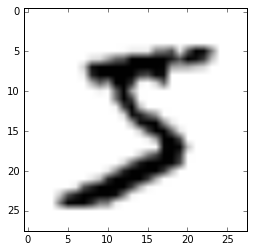

In [5]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
plt.imshow(X_train[0][0], cmap=cm.binary)

0


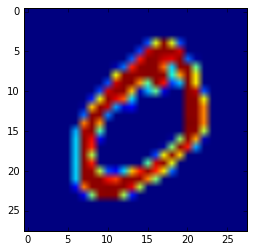

In [6]:
plt.imshow(X_train[1][0])
print y_train[1]

In [7]:
net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 28, 28),
    # layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=256,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=10,
    verbose=1,
    )
# Train the network
nn = net1.fit(X_train, y_train)

print "Done!!"

/Users/waihamyee/anaconda/lib/python2.7/site-packages/lasagne/layers/conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  border_mode=border_mode)


# Neural Network with 160362 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv2d1   32x24x24
  2  maxpool1  32x12x12
  3  conv2d2   32x8x8
  4  maxpool2  32x4x4
  5  dropout1  32x4x4
  6  dense     256
  7  dropout2  256
  8  output    10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     0.82554     0.15706    5.25621      0.95532  44.27s
      2     0.25634     0.10450    2.45310      0.97021  45.84s
      3     0.19268     0.08457    2.27829      0.97591  44.35s
      4     0.15943     0.07494    2.12738      0.97801  40.60s
      5     0.13694     0.06598    2.07546      0.98131  40.66s
      6     0.12258     0.05980    2.04974      0.98251  41.43s
      7     0.10879     0.05736    1.89671      0.98351  53.05s
      8     0.10184     0.05390    1.88955      0.98411  43.43s
      9     0.09688     0.04939    1.96169      0.98

In [11]:
preds = net1.predict(X_test)

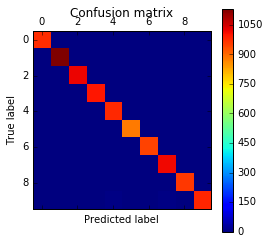

In [15]:
cm = confusion_matrix(y_test, preds)
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<module 'matplotlib.pyplot' from '/Users/waihamyee/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

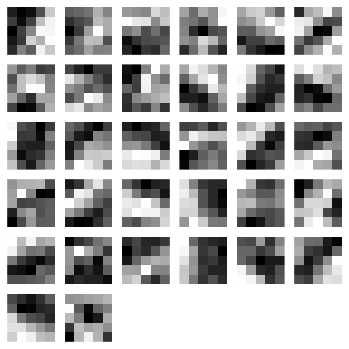

In [16]:
visualize.plot_conv_weights(net1.layers_['conv2d1'])

In [18]:
dense_layer = layers.get_output(net1.layers_['dense'], deterministic=True)
output_layer = layers.get_output(net1.layers_['output'], deterministic=True)
input_var = net1.layers_['input'].input_var
f_output = theano.function([input_var], output_layer)
f_dense = theano.function([input_var], dense_layer)

500 loops, best of 3: 387 µs per loop


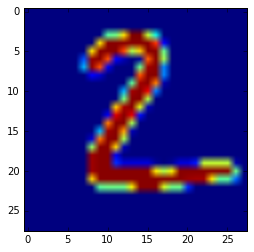

In [25]:
instance = X_test[0][None, :, :]
%timeit -n 500 f_output(instance)
plt.imshow(X_test[0][0])
plt.imshow(X_test[1][0])

<Container object of 10 artists>

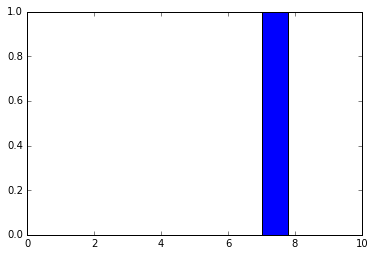

In [20]:
pred = f_output(instance)
N = pred.shape[1]
plt.bar(range(N), pred.ravel())